In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Librerias**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

**Instalación de UpSet Plot Libreria** https://upsetplot.readthedocs.io/en/stable/

In [3]:
pip install UpSetPlot

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for UpSetPlot: filename=UpSetPlot-0.9.0-py3-none-any.whl size=24817 sha256=31e2f8e12f8ad6e45237e3b808ed9e8d970470768361fe02476f21f29004de60
  Stored in directory: /root/.cache/pip/wheels/73/42/9f/1c9718ea27f30466d2787e0f7d88a7cb11942e3460c17e0ef6
Successfully built UpSetPlot


**Nombre de los archivos para iterar en ellos**

In [4]:
cell_class=[
    "Exc",
    "Inh",
    "Non-neuronal"
]

CCARGA DE ARCHIVOS


-----------------------------------------------------------------------

Tamaño de la lista: 3 


-----------------------------------------------------------------------


Genes en Exc: 
 0            AADAC
1           ABCC12
2            ABCC3
3        ABHD17AP6
4              ABO
           ...    
2091      ZNF101P1
2092        ZNF177
2093    ZNF503-AS1
2094        ZNF831
2095         ZWINT
Name: Cell type, Length: 2096, dtype: object

Genes en Inh: 
 0        ABCA9-AS1
1            ABCB5
2           ABI3BP
3            ACADL
4             ACAN
          ...     
929    ZNF385D-AS1
930    ZNF385D-AS2
931         ZNF536
932         ZNF608
933           ZPBP
Name: Cell type, Length: 934, dtype: object

Genes en Non-neuronal: 
 0          A2M
1       A4GALT
2         AASS
3        ABCA2
4        ABCA8
         ...  
3081    ZNF812
3082    ZNF813
3083     ZNF90
3084     ZNRF3
3085     ZPLD1
Name: Cell type, Length: 3086, dtype: object

--------------------------------------------------

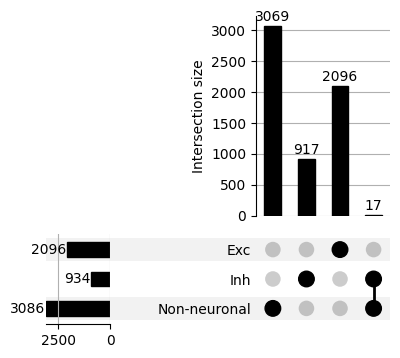

In [21]:
  # Carga de librerias Upset

from upsetplot import UpSet
from upsetplot import from_contents
import time

  # Lista vacia
lista=[]


  # Ciclo para iterar en los archivos con nombre de las clases celulares

for phenotype in cell_class:

      # Colocar la ruta de tu archivo, en la parte de "phenotype" obtendra los archivos segun el nombre en la variable "cell_class"
    updown=pd.read_csv("/content/drive/MyDrive/Codes/Class/"+ phenotype +"_down.csv")
    gene=updown["Cell type"]
    lista.append(gene)
    #time.sleep(30)

print("\n-----------------------------------------------------------------------\n")
print("Tamaño de la lista:",len(lista),"\n")



print("\n-----------------------------------------------------------------------\n")
print("\nGenes en Exc: \n",lista[0])
print("\nGenes en Inh: \n",lista[1])
print("\nGenes en Non-neuronal: \n",lista[2])



celltype=from_contents({


  "Exc":lista[0],
  "Inh":lista[1],
  "Non-neuronal":lista[2]

})


  # Rangos
# Exc: 4-59
# Inh: 60-113
# Non: 0-3 y 114-119

print("\n-----------------------------------------------------------------------\n")
print("Tipo de dato UpSet: \n",celltype)

  # Guardar en csv
#celltype.to_csv("UpGenes_data_form.csv")
#sort_categories_by="-input"
#sort_by="cardinality"

print("\n-----------------------------------------------------------------------\n")
  #Mostrar figura
ax_dict = UpSet(celltype, show_counts=True, min_subset_size=1, subset_size="count", other_dots_color=0.2, sort_categories_by="-input", orientation="horizontal").plot()

  #Guardar figura
#plt.savefig('Upsetplot_up_class.svg', format='svg', bbox_inches='tight')


**Genes particulares de tipos celulares**

In [22]:
print("\n-----------------------------------------------------------------------\n")
print("\nNombre de las columnas",celltype.columns,"\n")
print("\n-----------------------------------------------------------------------\n")

print("\nUpSet datatype:\n",celltype)

celltype=celltype.reset_index()
print("\n-----------------------------------------------------------------------\n")
print("Número de genes en las tres clases de células:",len(celltype["id"].unique()))


-----------------------------------------------------------------------


Nombre de las columnas Index(['id'], dtype='object') 


-----------------------------------------------------------------------


UpSet datatype:
                                  id
Exc   Inh   Non-neuronal           
True  False False             AADAC
            False            ABCC12
            False             ABCC3
            False         ABHD17AP6
            False               ABO
...                             ...
False False True             ZNF812
            True             ZNF813
            True              ZNF90
            True              ZNRF3
            True              ZPLD1

[6099 rows x 1 columns]

-----------------------------------------------------------------------

Número de genes en las tres clases de células: 6099


In [24]:
print("\n-----------------------------------------------------------------------\n")
print(celltype)
print("\n-----------------------------------------------------------------------\n")
  # Guardar en csv
#celltype.to_csv("/content/drive/MyDrive/Mesoconectoma/Experiments/SM/"+"matrix_true_false_up.csv", index=False)



-----------------------------------------------------------------------

        Exc    Inh  Non-neuronal         id
0      True  False         False      AADAC
1      True  False         False     ABCC12
2      True  False         False      ABCC3
3      True  False         False  ABHD17AP6
4      True  False         False        ABO
...     ...    ...           ...        ...
6094  False  False          True     ZNF812
6095  False  False          True     ZNF813
6096  False  False          True      ZNF90
6097  False  False          True      ZNRF3
6098  False  False          True      ZPLD1

[6099 rows x 4 columns]

-----------------------------------------------------------------------



**Genes unicos de cada clase de célula** (No se comparten)

In [26]:
import time

for cell in cell_class:

  exc_neuron=celltype[[cell, "id"]]
  non_neuron=celltype.loc[:,celltype.columns!=cell]

  print("\n-----------------------------------------------------------------------\n")
  print(exc_neuron)
  print(non_neuron)
  print("\n-----------------------------------------------------------------------\n")

  result_exc_neuron= exc_neuron.loc[exc_neuron[cell]==True]
  print("\n-----------------------------------------------------------------------\n")
  print("\nAqui va el proceso","\n",result_exc_neuron)
  print("\n-----------------------------------------------------------------------\n")
  result_exc_neuron=result_exc_neuron["id"].tolist()

  print(len(result_exc_neuron))
  #time.sleep(10)


  list_df=[]

  for i in non_neuron.loc[:,non_neuron.columns!="id"]:

    result_non_neuron= non_neuron.loc[non_neuron[i]==True]

    list_df.append(result_non_neuron["id"])
    #print(result_non_neuron)

  new_list=[]
  for i in list_df:
    for item in i:
      new_list.append(item)


  #print(len(new_list))

  list1=set(result_exc_neuron)
  list2=set(new_list)

    #En la varible "a" se guardaran los genes unicos de cada una de las clases
  a=[]
  a=list1-list2
  a=list(a)
  print(type(a))
  a=pd.DataFrame(a)
  a.rename(columns={0:cell},inplace=True)
  print("\n-----------------------------------------------------------------------\n")
  print("\nUnicos\n")
  print(a)
  print("\n-----------------------------------------------------------------------\n")
  #time.sleep(10)

    # Guarda los genes unicos de cada clase celular en un csv
  #a.to_csv("/content/drive/MyDrive/Mesoconectoma/Experiments/Por clase/Genes unicos por clase/"+cell+"_down.csv", index=False)



-----------------------------------------------------------------------

        Exc         id
0      True      AADAC
1      True     ABCC12
2      True      ABCC3
3      True  ABHD17AP6
4      True        ABO
...     ...        ...
6094  False     ZNF812
6095  False     ZNF813
6096  False      ZNF90
6097  False      ZNRF3
6098  False      ZPLD1

[6099 rows x 2 columns]
        Inh  Non-neuronal         id
0     False         False      AADAC
1     False         False     ABCC12
2     False         False      ABCC3
3     False         False  ABHD17AP6
4     False         False        ABO
...     ...           ...        ...
6094  False          True     ZNF812
6095  False          True     ZNF813
6096  False          True      ZNF90
6097  False          True      ZNRF3
6098  False          True      ZPLD1

[6099 rows x 3 columns]

-----------------------------------------------------------------------


-----------------------------------------------------------------------


Aqui va

PRUEBA LINK DE LA LIBRERIA: https://upsetplot.readthedocs.io/en/stable/